<a href="https://colab.research.google.com/github/Jocelyn-Garcia4rt/Matematicas/blob/main/Unidad_II_Modelado_Matem%C3%A1tico_Jocelyn_Sarahi_Garcia_Verdin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Problema en Clase 1: Prediccion de la Carga de la Carga del Servidor de un Sistema de Comercio Electronico

SyntaxError: invalid syntax (<ipython-input-1-78038d0fb887>, line 1)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
original_data = pd.read_csv('datos_servidor_simulados.csv')
original_data


,Tiempo (s),Solicitudes Observadas
0,203,506.915084
1,266,431.434603
2,152,183.415138
3,9,4277.463536
4,233,370.152769
...,...,...
295,188,368.962604
296,71,935.523155
297,106,821.016070
298,270,155.591439


Text(0.5, 1.0, 'Graficos de Solicitudes Observadas vs. Tiempo')

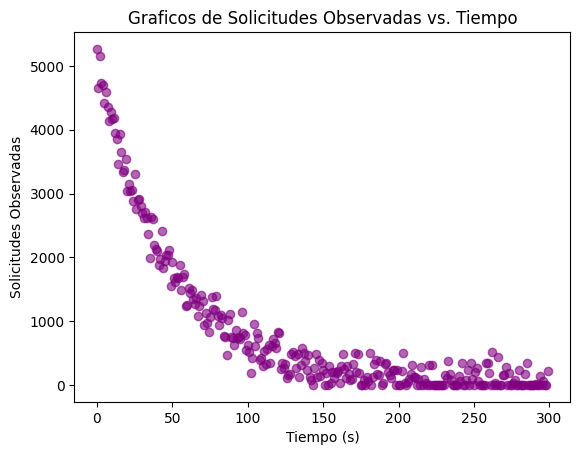

In [ ]:
import matplotlib.pyplot as plt

x_original = original_data['Tiempo (s)'].values
y_original = original_data['Solicitudes Observadas'].values

plt.scatter(x_original, y_original, color='purple', alpha=0.6)
plt.xlabel('Tiempo (s)')
plt.ylabel('Solicitudes Observadas')
plt.title('Graficos de Solicitudes Observadas vs. Tiempo')


In [ ]:
import numpy as np
def modelo_lineal(x, a, b):
  return a + b*x

def modelo_cuadratico(x, a, b, c):
  return a + b*x + c*x**2

def modelo_exponencial(x, a, b):
  return a*np.exp(b*x)

def modelo_logaritmico(x, a, b):
  return a+b*np.log(x)


In [ ]:
from sklearn.model_selection import train_test_split
datos_entrenamiento, datos_validacion = train_test_split(original_data, test_size=0.2, random_state=40)

fig, axes=plt.subplots(2)

In [ ]:
from scipy.optimize import curve_fit

parametro_lineal = curve_fit(modelo_lineal, datos_entrenamiento['Tiempo (s)'].values, datos_entrenamiento['Solicitudes Observadas'])
parametros_cuadratico = curve_fit(modelo_cuadratico, datos_entrenamiento['Tiempo (s)'].values, datos_entrenamiento['Solicitudes Observadas'])
parametros_exponencial = curve_fit(modelo_exponencial, datos_entrenamiento['Tiempo (s)'].values, datos_entrenamiento['Solicitudes Observadas'])
parametros_logaritmico = curve_fit(modelo_logaritmico, datos_entrenamiento['Tiempo (s)'].values, datos_entrenamiento['Solicitudes Observadas'])

print("Parametros del Modelo Lineal:", parametros_lineal[0])
print("Parametros del Modelo cuadratico:", parametros_cuadratico[0])


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print("Error cuadrático medio (MSE) del modelo lineal:", mean_squared_error(datos_validacion['Solicitudes Observadas'].values, modelo_lineal(datos_validacion['Tiempo (s)'].values, *parametros_lineal[0])))
print("Error cuadrático medio (MSE) del modelo cuadrático:", mean_squared_error(datos_validacion['Solicitudes Observadas'].values, modelo_cuadratico(datos_validacion['Tiempo (s)'].values, *parametros_cuadraticos[0])))
print("Error cuadrático medio (MSE) del modelo exponencial:", mean_squared_error(datos_validacion['Solicitudes Observadas'].values, modelo_exponencial(datos_validacion['Tiempo (s)'].values, *parametros_exponencial[0])))
print("Error cuadrático medio (MSE) del modelo logarítmico:", mean_squared_error(datos_validacion['Solicitudes Observadas'].values, modelo_logaritmico(datos_validacion['Tiempo (s)'].values, *parametros_logaritmico[0])))